# ***SUPPORT VECTOR REGRESSION***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
url = "https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/concrete_slump_test.csv"
df = pd.read_csv(url)

In [ ]:
print(df.head())

   Unnamed: 0  No  Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  \
0           0   1   273.0   82.0    105.0  210.0   9.0         904.0   
1           1   2   163.0  149.0    191.0  180.0  12.0         843.0   
2           2   3   162.0  148.0    191.0  179.0  16.0         840.0   
3           3   4   162.0  148.0    190.0  179.0  19.0         838.0   
4           4   5   154.0  112.0    144.0  220.0  10.0         923.0   

   Fine Aggr.  SLUMP(cm)  FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0       680.0       23.0      62.0                               34.99  
1       746.0        0.0      20.0                               41.14  
2       743.0        1.0      20.0                               41.81  
3       741.0        3.0      21.5                               42.08  
4       658.0       20.0      64.0                               26.82  


In [ ]:
X = df.drop(columns=['SLUMP(cm)'])
y = df['SLUMP(cm)']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel='linear', C=100, epsilon=0.1)
svr_poly = SVR(kernel='poly', C=100, epsilon=0.1, degree=3)

svr_rbf.fit(X_train_scaled, y_train)
svr_lin.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)

SVR(C=100, kernel='poly')

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_rbf = svr_rbf.predict(X_test_scaled)
y_pred_lin = svr_lin.predict(X_test_scaled)
y_pred_poly = svr_poly.predict(X_test_scaled)

def evaluate(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name}: RMSE = {rmse:.3f}, R² = {r2:.3f}")

evaluate(y_test, y_pred_rbf, "SVR (RBF)")
evaluate(y_test, y_pred_lin, "SVR (Linear)")
evaluate(y_test, y_pred_poly, "SVR (Polynomial)")


SVR (RBF): RMSE = 2.527, R² = 0.879
SVR (Linear): RMSE = 2.583, R² = 0.873
SVR (Polynomial): RMSE = 3.794, R² = 0.726


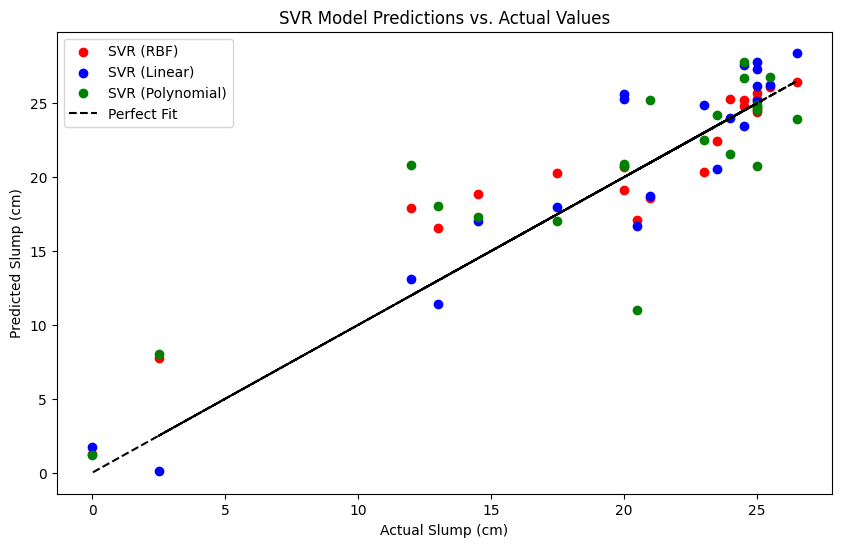

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rbf, color='red', label="SVR (RBF)")
plt.scatter(y_test, y_pred_lin, color='blue', label="SVR (Linear)")
plt.scatter(y_test, y_pred_poly, color='green', label="SVR (Polynomial)")
plt.plot(y_test, y_test, color='black', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Slump (cm)")
plt.ylabel("Predicted Slump (cm)")
plt.legend()
plt.title("SVR Model Predictions vs. Actual Values")
plt.show()
